In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
train = pd.read_csv('/content/sign_mnist_test.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [ ]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

Label for the image is:  H


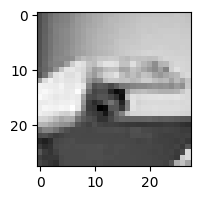

In [ ]:
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray')
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

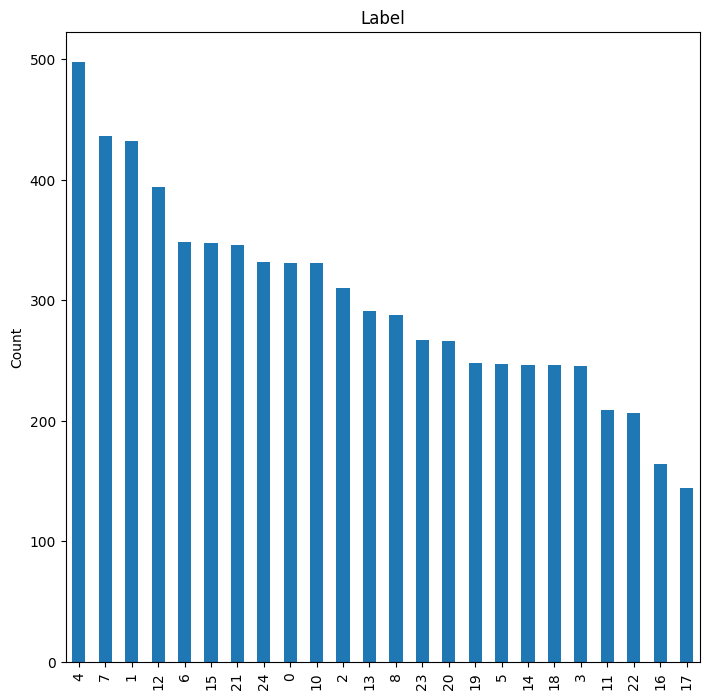

In [ ]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [ ]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [ ]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))


In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [ ]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 30, verbose = 1, validation_data = (X_test, y_test_cat))


Epoch 1/30
57/57 [==============================] - 3s 17ms/step - loss: 3.1706 - acc: 0.0678 - val_loss: 3.1469 - val_acc: 0.0609
Epoch 2/30
57/57 [==============================] - 1s 9ms/step - loss: 3.0410 - acc: 0.1129 - val_loss: 2.7143 - val_acc: 0.2175
Epoch 3/30
57/57 [==============================] - 1s 17ms/step - loss: 2.3408 - acc: 0.2925 - val_loss: 1.6692 - val_acc: 0.5195
Epoch 4/30
57/57 [==============================] - 1s 13ms/step - loss: 1.6172 - acc: 0.4907 - val_loss: 1.0951 - val_acc: 0.6909
Epoch 5/30
57/57 [==============================] - 1s 11ms/step - loss: 1.2421 - acc: 0.5943 - val_loss: 0.8213 - val_acc: 0.7386
Epoch 6/30
57/57 [==============================] - 1s 10ms/step - loss: 1.0065 - acc: 0.6655 - val_loss: 0.5849 - val_acc: 0.8483
Epoch 7/30
57/57 [==============================] - 0s 9ms/step - loss: 0.8244 - acc: 0.7249 - val_loss: 0.4338 - val_acc: 0.8864
Epoch 8/30
57/57 [==============================] - 1s 12ms/step - loss: 0.6855 - acc

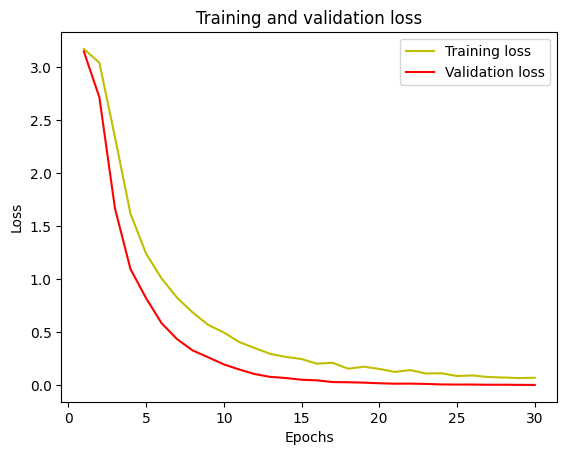

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

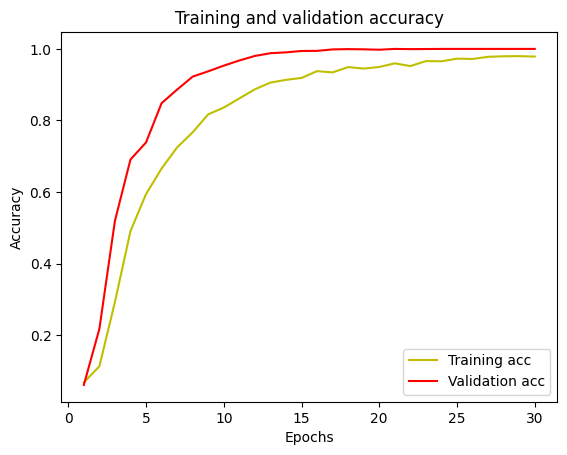

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test)


225/225 [==============================] - 0s 2ms/step


In [ ]:
predicted_classes = prediction.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ', accuracy)

Accuracy Score =  1.0


Predicted Label:  E
True Label:  E


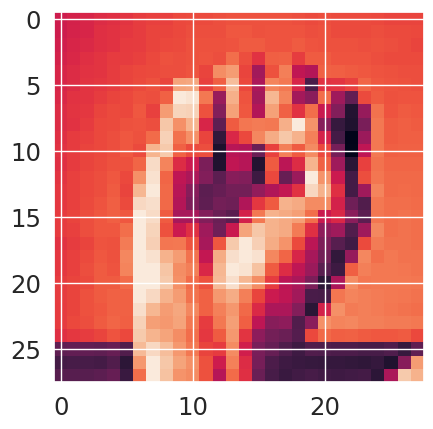

In [ ]:
i = random.randint(1,len(predicted_classes))
plt.imshow(X_test[i,:,:,0])
print("Predicted Label: ", class_names[int(predicted_classes[i])])
print("True Label: ", class_names[int(y_test[i])])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)


<Axes: >

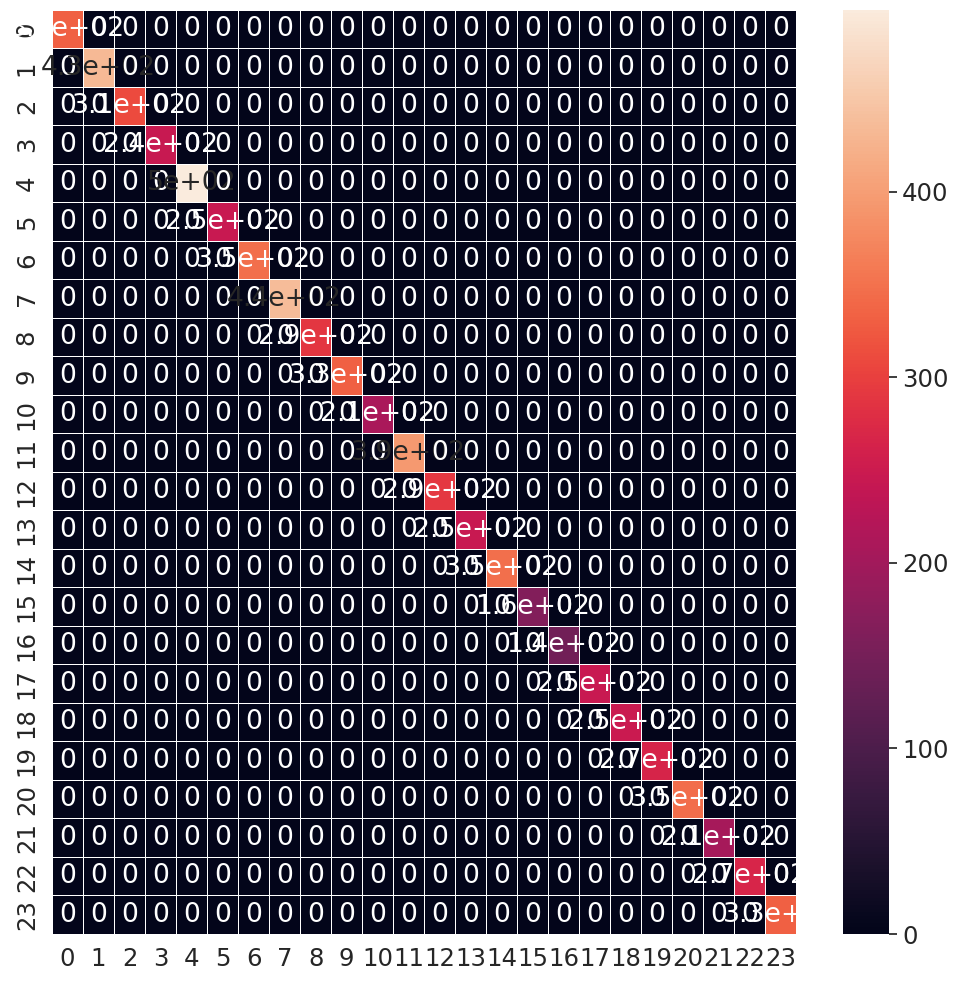

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x786bf2b55150>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

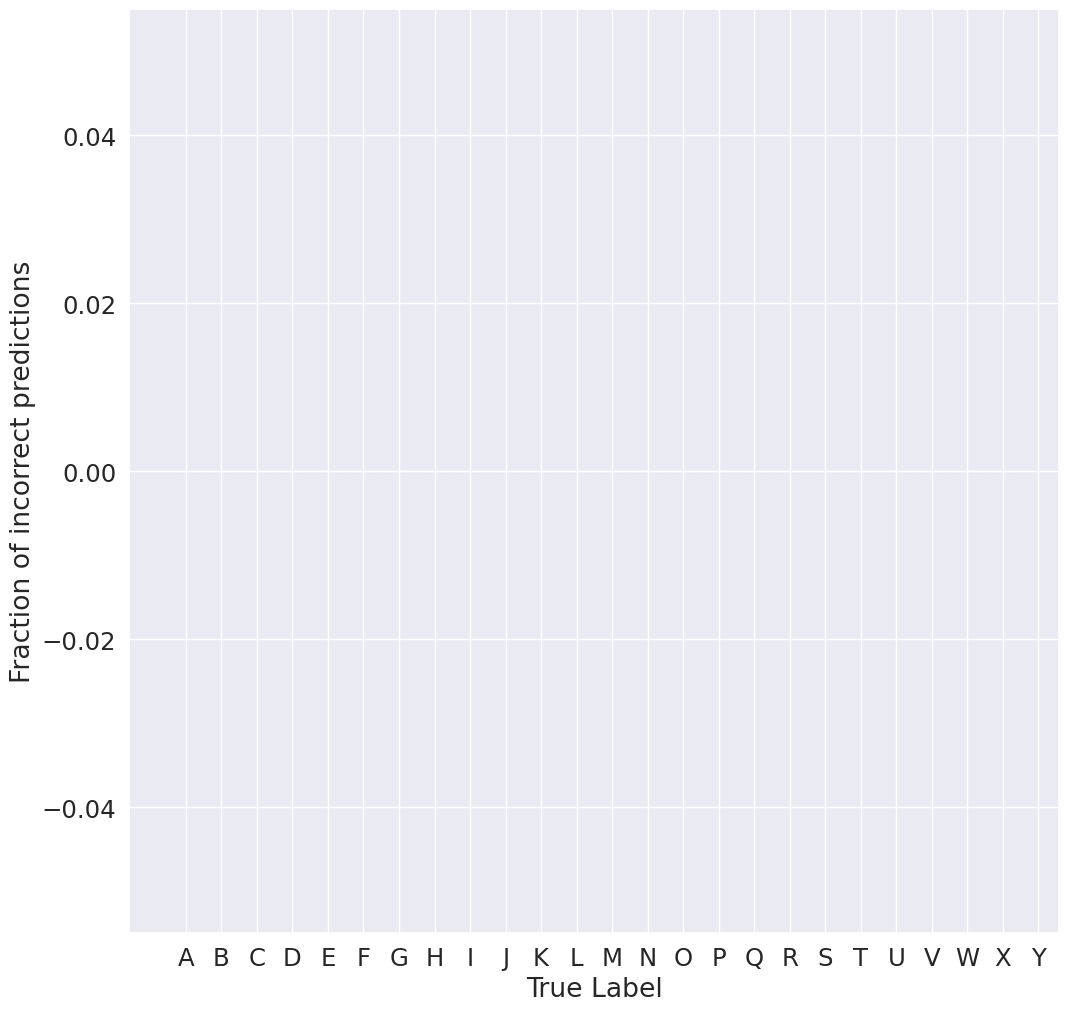

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(len(class_names)), class_names)

In [ ]:
from tensorflow.keras.models import save_model

model.save('asl_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

files.download('asl_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>